# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Tree-based Methods: Random Forests</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

In order to explain nonlinear phenomena, different parametric and nonparametric nonlinear regression models have been developed so far. 

***Parametric*** nonlinear regression models attempt to characterise the relationship between predictors and response with parametric nonlinear functions. The parameters can take the form of a polynomial, exponential, trigonometric, power, or any other nonlinear function. In other words, in parametric nonlinear models the shape of the functional relationships between the response and the predictors are predetermined. 

In many situations, that relationship is unknown and ***nonparametric*** nonlinear regression models should be used. In nonparametric models, the shape of the functional relationships between variables can be adjusted to capture unusual or unexpected features of the data. 

The main types of nonparametric regression models are 

1. Kernel-based methods
    - Kernel-based methods can be viewed as a nonlinear mapping from inputs into higher dimensional feature space in the hope that the data will be linearly separable or better structured. It measures distances between observations, then predicts new values based on these distances. Best known example are support vector machines (SVMs), introduced by Vapnik (Chervonenkis and Vapnik, 1964, 1974; Vapnik, 1982, 1995), which provide a structured way to use a linear algorithm in a transformed feature space. The key advantage this so-called kernel trick brings is that nonlinear patterns can be found at a reasonable computational cost. Perhaps the biggest limitation of the kernel-based methods lies in choice of the kernel and tuning model parameters.


2. Tree-based regression models
    - Tree-based regression models are alternative (nonparametric and nonlinear) approaches to regression that are not based on assumptions of normality and userspecified model statements. These models originated in the 1960s with the development of AID (Automatic Interaction Detection) by Morgan and Sonquist. In the 1980s, statisticians Breiman et al. (1984) developed CART(Classification And Regression Trees). The fundamental idea is to recursively partition the regressors’ space in regions (build a tree) until all the subspaces are sufficiently homogeneous in order to estimate the regression function with the sample average (or the specific local model employed) in each region.
    
    
3. Artificial neural networks
    - NNs are flexible function forms motivated by the way the brain processes information. neural networks consist of a cascade of simple computational units called neurons, which are highly interconnected. Depending on how they are constructed, neural nets can approximate functions that are generally unknown.




In this notebook we study Decision Trees and Random Forests which are two versatile machine learning models that are applicable to many machine learning tasks. These are nonlinear and nonparametric models that are not based on assumption of normality and user-specified model statements. Looking at your data might give you some clues as to use a linear model or a decision tree-based model: Logistic regression provides very good results when independent variables are continuous in nature, and also linearity holds true. On the other hand decision trees perform better when you have categorical data. However, notice that if you have hundreds of possible values for your categorical feature, decision trees tend to grow large which in turn may result in overfitting. Decision trees, however, are more resilient toward outliers.



Consider a classification task defined over the Wine dataset: to predict the type (target class label) of a wine based on its 13 features. Followings are the steps we are going to perform:

<ol>
    <li>
    Randomly split the Wine dataset into the training dataset $\mathbb{X}^{\text{train}}=\{(\boldsymbol{x}^{(i)},y^{(i)})\}_{i}$ and testing dataset $\mathbb{X}^{\text{test}}=\{(\boldsymbol{x}'^{(i)},y'^{(i)})\}_{i}$;
    </li>
    <li>
    Model development:
        <ol style='A'>
            <li>Model: $\{f(x)=y\}$ where each $f$ represents a decision tree;</li>
            <li>Cost function: the <b>entropy</b> (impurity) of class labels of data corresponding to the leaf nodes;</li>
        </ol>
    </li>
    <li>
    Training: to grow a tree $f^∗$ by recursively splitting the leaf nodes such that each split leads to the maximal $information$ $gain$ over the corresponding training data;
    </li>
    <li>
    Testing: to calculate the <b>prediction accuracy</b> $$\frac{1}{\vert\mathbb{X}^{\text{test}}\vert}\Sigma_{i}1(\boldsymbol{x}'^{(i)};f^{*}(\boldsymbol{x}'^{(i)})=y'^{(i)})$$ using the testing dataset.
    </li>
    <li>
    Visualize $f^∗$ so we can interpret the meaning of rules.
    </li>
</ol>

You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).

The attributes are
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 

## Preparing and Splitting Data

Let's prepare the training and testing datasets:

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import seaborn; seaborn.set()

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


The data is the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

## Decision Trees

In decision trees, the goal is to tidy the data by looking at the values of the feature vector associated with each data point. You try to separate your data and group the samples together in the classes they belong to. You know their label since you construct the trees from the training set. You maximize the purity of the groups as much as possible each time you create a new node of the tree (meaning you cut your set in two). Of course, at the end of the tree, you want to have a clear answer. Based on the values of each feature, decisions are made that eventually leads to a leaf and an answer.

At each step, each branching, you want to decrease the entropy, so this quantity is computed before the cut and after the cut. Entropy is a measure of disorder. If it decreases, the split is validated and we can proceed to the next step, otherwise, we must try to split with another feature or stop this branch.

Tree-based models split the data according to certain cutoff values in the features multiple times. Splitting means that different subsets of the dataset are created, where each instance belongs to one subset. The final subsets are called terminal or leaf nodes and the intermediate subsets are called internal nodes or split nodes. For predicting the outcome in each leaf node, a simple model is fitted with the instances in this subset (for example the subsets average target outcome). Trees can be used for classification and regression.

Let us reiterate: A tree structure is constructed that breaks the dataset down into smaller subsets eventually resulting in a prediction. There are decision nodes that partition the data and leaf nodes that give the prediction that can be followed by traversing simple IF..AND..AND….THEN logic down the nodes. The root node (the first decision node) partitions the data based on the most influential feature partitioning. There are 2 measures for this, **Gini Impurity** and **Entropy**.

### Entropy

The root node (the first decision node) partitions the data using the feature that provides the most information gain.

Information gain tells us how important a given attribute of the feature vectors is.

It is calculated as:

>  Information Gain = entropy(parent)–\[average entropy(children)\]

Where entropy is a common measure of target class impurity, given as:

$$
Entropy = \Sigma_i-p_i \log_2p_i
$$

Here $p$ is a fraction of examples in a given class, and $i$ is each of the target classes.

### Gini Impurity

Gini Impurity is another measure of impurity and is calculated as follows:

$$
Gini = 1 - \Sigma_i p^2_i
$$


Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in reality which of the two methods is used rarely makes too much of a difference.

### Decision Trees in Action

Most algorithms use binary trees, mainly, we will focus on the CART algorithm which is implemented in the Scikit-Learn library. The CART algorithm produces only binary trees: nonleaf nodes always have 2 children (i.e. questions only have yes/no answers).


#### Choosing the Property (=Feature) to Test

- For a given point of splitting, what is the next feature the descision should build upon?
- Simple questions: each branch should consider few features (1 if it is binary)
- The first features to be chosen should be the ones that eliminate the most options 
    - Which is to say, increase the certainty of the decision Or, 
    - lead us to nodes that are homogenous (pure)
    
#### Stopping Criteria

When should a node be declared a leaf?

#### Pruning
If the tree becomes too large (and thus, overfitting to the train dataset), how, and to what length, it can be made smaller and simpler?

We do not go into details of implementing decision trees. Thankfully `scikit-learn` comes with a good off-the-shelf implementation and we use that to build our model. We proceed by fitting the model on the data:

In [0]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
_ = tree.fit(X_train, y_train)

Notice how we skipped normalization/standardization of the dataset. Unlike many models, decision trees (or random forests) are not sensitive the scale of the variables. That is because the information gain of a cutting point does not change when we scale values of an attribute.

Having trained the model, let's test it to see how it performs;

In [4]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


Decision trees (similar to linear models) are considered white-box models, as the prediction process can be interpreted. That is not always the case, as we will see later with deep learning models.

By visualizing a tree, we can understand how a prediction is made by breaking down a classification rule into a series of questions about the data features.

In [0]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus
from sklearn.externals.six import StringIO

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

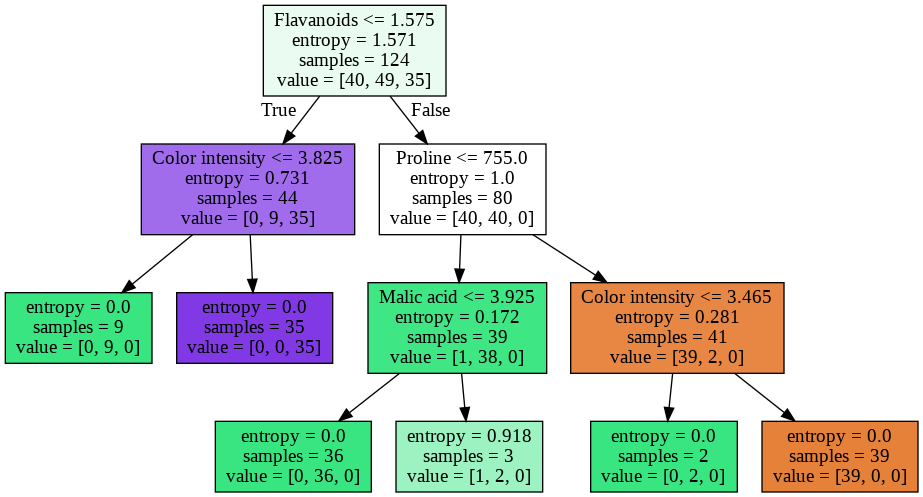

In [6]:
jupyter_graphviz(tree, filled=True, feature_names=X.columns.values)

Some **advantages** of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. 
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. 
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The **disadvantages** of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not supportedin scikit-learn's implementation), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



## Random Forests

Random forests have gained huge popularity in applications of machine learning during the last decade due to their good classification performance, scalability, and ease of use. Intuitively, a random forest can be considered as an **ensemble** of decision trees. The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization performance. The random forest algorithm can be summarized in four simple steps:

<ol>
    <li>Randomly draw $M$ <b>bootstrap samples</b> from the training set with replacement;</li>
    <li>Grow a decision tree from the bootstrap samples. At each node:
        <ol style='A'>
            <li><b>Randomly select</b> $K$ <b>features</b> without replacement;</li>
            <li>Split the node by finding the best cut among the selected features that maximizes the information gain;</li>
        </ol>
    </li>
    <li>Repeat the steps 1 to 2 $T$ times to get $T$ trees;</li>
    <li>Aggregate the predictions made by different trees via the majority vote.</li>
</ol>

Although random forests don't offer the same level of interpretability as decision trees, a big advantage of random forests is that we don't have to worry so much about the depth of trees since the majority vote can "absorb" the noise from individual trees. Therefore, we typically don't need to prune the trees in a random forest. The only parameter that we need to care about in practice is the number of trees. Generally, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost. Another advantage is that the computational cost can be distributed to multiple cores/machines since each tree can grow independently.


Once again let's see how it works in action by using the `scikit-learn` implementation:

In [7]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


We get a slightly improved accuracy of 98%, that is one of the misclassified samples is now correctly classified.

# Feature Engineering

## Feature Importance

In addition to classification, a random forest can be used to calculate the feature importance. Using a random forest, we can measure feature importance as the averaged information gain (impurity decrease) computed from all decision trees in the forest.



 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


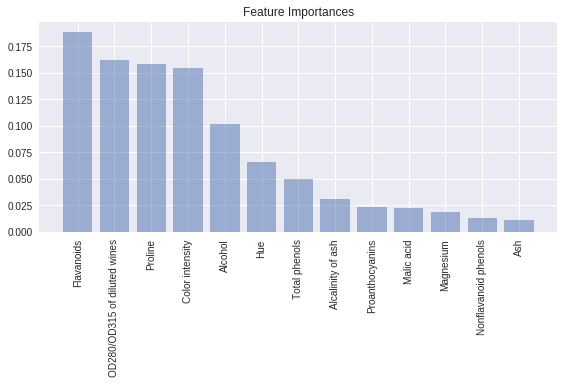

In [8]:
import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

## Feature Selection

By discarding the unimportant features, we can reduce the dimension of data points and compress data. For example, $Z_{rf}$ is a compressed 2-D dataset that contains only the most important two features "Flavanoids" and "OD280/OD315" suggested by random forest:

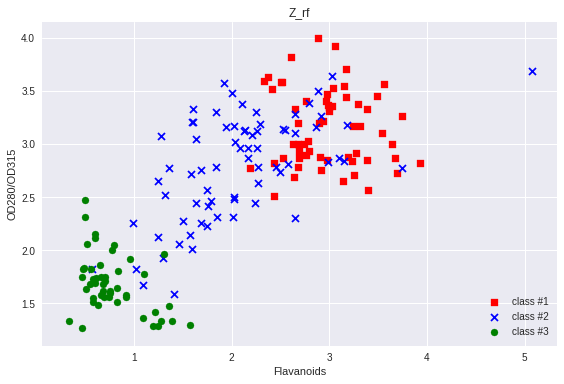

In [9]:
import matplotlib.pyplot as plt

Z_rf = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_rf[y.values==l, 0], 
                Z_rf[y.values==l, 1], 
                c=c, label='class #'+str(l), marker=m)

plt.title('Z_rf')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

We need to mention that `scikit-learn` also has a class called `SelectFromModel` that helps you select features based on a user-specified threshold, which is useful if we want to use the `RandomForestClassifier` as a feature selector. For example, by setting the threshold to 0.16 we get 

In [10]:
from sklearn.feature_selection import SelectFromModel

# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.16, prefit=True)
Z_rf2 = sfm.transform(X)

for f in range(Z_rf2.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
